# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 7, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Christos Perchanidis    14601206
River Vaudrin           11877154

Run the following cell to import the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy in single-precision floating point numbers
Working with real numbers on a computer can sometimes be counter-intuitive. Not every real number cannot be represented exactly, because that would require an infinite amount of memory. Real numbers are in Python represented as "double-precision floating point numbers" that approximate the real numbers they represent. As such, the usual "rules of mathematics" no longer hold for very small or very large numbers:

In [2]:
print("very small numbers:")
print(1 - 1)          # Should be zero
print(1 - 1 + 1e-17)  # Should be 10 ** -17, i.e. a very small number
print(1 + 1e-17 - 1)  # Should *also* be 10**-17, but is it?

print("very large numbers:")
print(2.0**53)        # Some very large number
print(2.0**53 + 1.0)  # Some very large number + 1

very small numbers:
0
1e-17
0.0
very large numbers:
9007199254740992.0
9007199254740992.0


Usually, you don't have to worry about these rounding errors. But in scientific computing, these rounding errors sometimes become important. To reveal this problem more directly, we can decrease the precision of these approximations, using "single precision" instead of double precision floating point numbers, by employing `np.single`:

In [3]:
print(1.0 + 10**-9)             # Should be slightly above 1
print(np.single(1.0 + 10**-9))  # But in single precision, it is exactly 1.

1.000000001
1.0


Today we will practice with these single-precision floating point numbers. One thing to keep in mind is that Python will *really* try to work with double-precision floats:

In [4]:
a = 5.0
b = np.single(5.0)
print("a and b represent the same value:", a == b)
print("but they are of different types:", type(a), type(b))
print("If I add zero to a, its type does not change: ", type(a) == type(a + 0.0))
print("If I add zero to b, its type *does* change:   ", type(b) == type(b + 0.0))

a and b represent the same value: True
but they are of different types: <class 'float'> <class 'numpy.float32'>
If I add zero to a, its type does not change:  True
If I add zero to b, its type *does* change:    False


Any time Python encounters a number like `1` or `0` or `math.pi`, it will interpret this as double precision, unless you use `np.single`. 

So we have to be extra careful when working with these single-precision numbers, to prevent these types changing. See the difference between `S` and `T` below.

In [5]:
S = 0.0
S += np.single(5.0)
print(type(S))

T = np.single(0.0)
T += np.single(5.0)
print(type(T))

<class 'numpy.float64'>
<class 'numpy.float32'>


## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


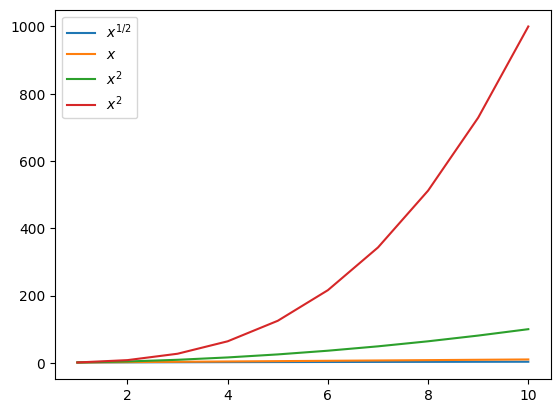

In [6]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

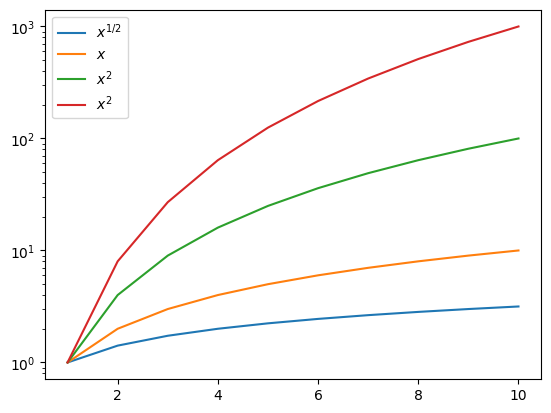

In [7]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


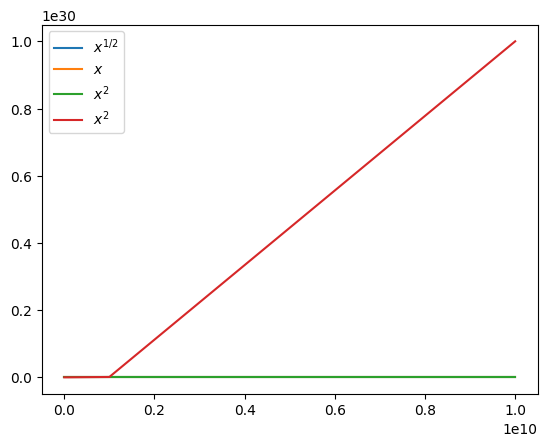

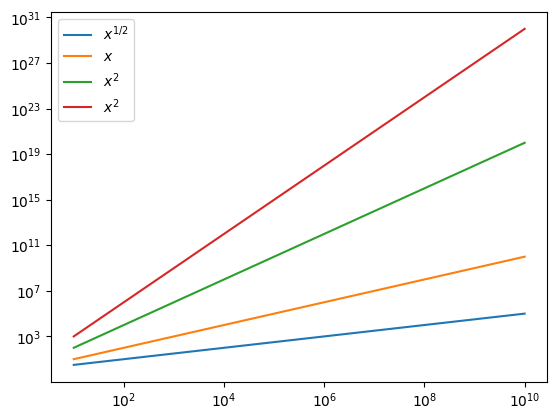

In [8]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

-----
# Exercise 1
This exercise is a variant of exercise 1.6 in the book.

## (a) 
Lookup the Taylor series for $\cos(x)$ in the base point $0$. (You don't have to hand in the series expansion)
## (b) (0.5 pt)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **two** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

Write your answer, using $\LaTeX$, in this box.

In [10]:
# Here go the notes
# Taylor for cos(x)

x=[0.2, 1.0, 2.0]
for x_i in x:
    cos_x = 1 - (x_i**2/np.math.factorial(2)) + (x_i**4/np.math.factorial(4))
    print(cos_x)

0.9800666666666666
0.5416666666666666
-0.33333333333333337


## (c) (0.5 pt)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **three** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

Write your answer, using $\LaTeX$, in this box.

## (d) (1 pt)
Compute the relative condition of $x \mapsto \cos(x)$ at $x = 0.2$, $x=1.0$ and $x=2.0$.

Write your answer, using $\LaTeX$, in this box.

# Exercise 2

This exercise is about computing the sum of a set of $n$ random numbers. You are asked to implement different ways to compute the sum. To be able to compare rounding errors for the different methods, all sums have to be executed in single precision (some hints are above), and implemented by yourself, unless specifically mentioned. The result of each sum can then be compared with a reference implementation that employs the standard double precision format.

Vary $n$ by choosing different powers of 10 at least up to, say, $10^7$.

## (a)
Create a function that returns an array of $n$ single precision random numbers (here denoted by $x_1$, $i=1, \ldots, n$), uniformly distributed in the interval $[0,1]$. You may use a suitable function from `numpy.random`.

Create a function to sum the numbers using double precision computations in the order they are generated. 

In [74]:
# your code here
def gen_rand_sing_prec(n):
    numbers = np.random.random_sample((n,)).astype('f') # Return a sample from uniform normal distribution as single precision float
    return numbers

def summation_double_prec(n):
    sum = 0.0
    for n_i in n:
        sum += n_i
    return sum

## (b) (a+b together 2 pts)
Create a function to sum the numbers in the order in which they were generated, this time using single-precision computations. Visualize the errors as a function of $n$ using a log-log plot.

In [84]:
def summation_single_prec(n):
    sum = np.single(0.0)
    for n_i in n:
        sum += n_i
    return sum

n_max = 2000
rand_arr = gen_rand_sing_prec(n_max)

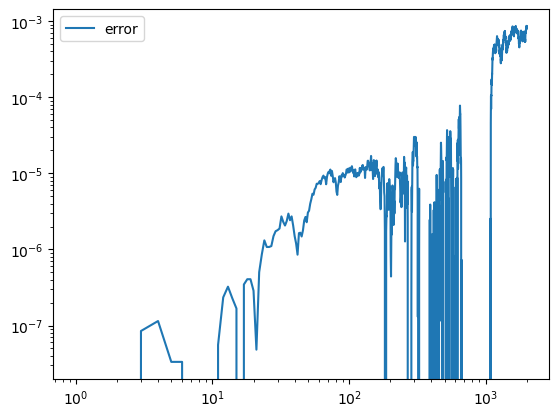

In [85]:
sum_single = []
sum_double = []
for n in range(1, n_max):
    sum_single.append(summation_single_prec(rand_arr[:n]))
    sum_double.append(summation_double_prec(rand_arr[:n]))

# VISUALIZE DIFFERENCE
#plt.loglog(sum_single, label=r"single")
#plt.loglog(sum_double, label=r"double")
plt.loglog(np.subtract(sum_double, sum_single), label=r"error")
plt.legend()
plt.show()

## (c) (1.5 pts)
Use the following compensated summation algorithm (due to Kahan), again using only single precision, to sum the numbers in the order in which they were generated:

<img src="Kahan_alg.png"
     width=200>
 
(algorithm at https://canvas.uva.nl/files/7499123/download?download_frd=1)

Plot the error as a function of $n$.

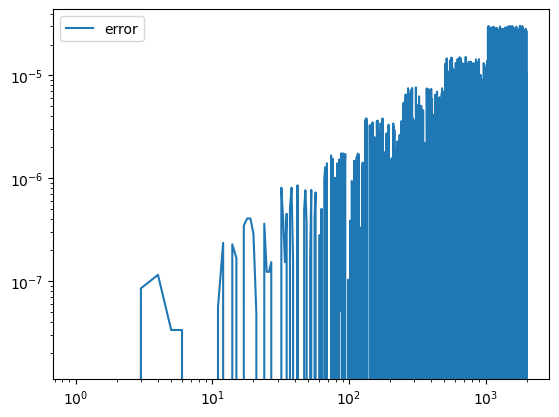

In [86]:
# your code here
import numbers

def summation_single_prec_kahan(n):
    sum = np.single(n[0])
    c = np.single(0)
    for n_i in range(1, len(n)):
        y = n[n_i] - c
        t = sum + np.single(y)
        c = (t - sum) - np.single(y)
        sum = t
    return sum

sum_single = []
for n in range(1, n_max):
    sum_single.append(summation_single_prec_kahan(rand_arr[:n]))

# VISUALIZE DIFFERENCE
#plt.loglog(sum_single, label=r"single")
#plt.loglog(sum_double, label=r"double")
plt.loglog(np.subtract(sum_double, sum_single), label=r"error")
plt.legend()
plt.show()

## (d) (1.5 pts)
Sum the numbers in increasing order of magnitude and plot the error. Sum the numbers in decreasing order of magnitude and plot the error. You may use a `sort` function from NumPy or some other package. (You don't need to use the Kahan sums here.)

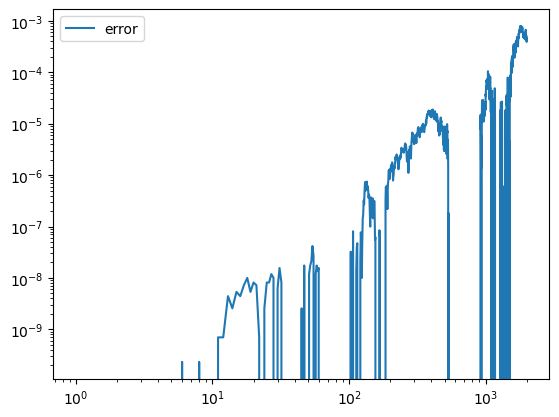

In [87]:
# your code here

rand_arr_ascending = sorted(rand_arr)

sum_single = []
sum_double = []
for n in range(1, n_max):
    sum_single.append(summation_single_prec(rand_arr_ascending[:n]))
    sum_double.append(summation_double_prec(rand_arr_ascending[:n]))

# VISUALIZE DIFFERENCE
#plt.loglog(sum_single, label=r"single")
#plt.loglog(sum_double, label=r"double")
plt.loglog(np.subtract(sum_double, sum_single), label=r"error")
plt.legend()
plt.show()

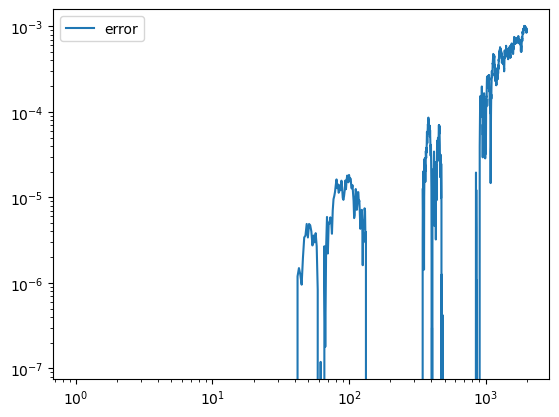

In [88]:
# your code here

rand_arr_descending = sorted(rand_arr, reverse=True)

sum_single = []
sum_double = []
for n in range(1, n_max):
    sum_single.append(summation_single_prec(rand_arr_descending[:n]))
    sum_double.append(summation_double_prec(rand_arr_descending[:n]))

# VISUALIZE DIFFERENCE
#plt.loglog(sum_single, label=r"single")
#plt.loglog(sum_double, label=r"double")
plt.loglog(np.subtract(sum_double, sum_single), label=r"error")
plt.legend()
plt.show()

## (e) (2 pts)
How do the methods rank in terms of accuracy? Can you explain the differences? Can you explain why the method of Kahan works? 
N.B.1 be precise in your explanations. Try to explain the size of any errors that are not incurred as well as of errors that are encurred.
N.B.2 you are required to formulate an answer in text. You may also add computations if you feel this helps in the explanations.

Write your answer, using $\LaTeX$, in this box.